# **NOTE:** Use File > Save a copy in Drive to make a copy before doing anything else

# Data Science using the Titanic Dataset

The Titanic is a ship and a disaster that has fascinated many. Despite being termed as "unsinkable", it sank after colliding with an iceberg in April of 1912. Many died, but some were able to use the limited number of lifeboats and survive. Out of that tragedy, comes this lesson.

The passenger manifest of the Titanic is available as a public dataset, hosted by [Kaggle](https://www.kaggle.com/competitions/titanic/data). The dataset is a CSV file where each row is a passenger and the columns are common details collected about each paspassenger. One of those columns is whether the passenger survived.

## Setup

We will first install the following Python modules to work with this dataset.

### Required Modules:

- **pandas**: Tabular data manipulation and analysis.
- **matplotlib**: Comprehensive library for making statistical plots.
- **seaborn**: Library for statistical plots attractive.

In [1]:
!pip install pandas==2.2.2
!pip install seaborn==0.13.2

## Meet the DataFrame

The Titanic manifest is a giant spreadsheet where each row is a passenger and each column is information about them—age, ticket class, fare, etc.

We will be using the python module called `pandas` to load the data. Once loaded, the data is collected into a table. The table is called a `DataFrame`. Since it is a table, a `DataFrame` stores the data in rows and columns, same as the original CSV file. You can do many interesting things using this `DataFrame`, like inspecting data, filtering data based on conditions, modifying data, etc. It makes it very easy to do it.


Here is a description of the various columns that will be available, once the data is loaded.


| Column        | Definition                     | Details                   |
|---------------|--------------------------------|---------------------------|
| `PassengerId` | Row Number                     | 1 to 891                  |
| `Survived`    | Survival outcome               | 0 = No, 1 = Yes           |
| `Pclass`      | Ticket class                   | 1 = 1st, 2 = 2nd, 3 = 3rd |
| `Name `       | Passenger Name                 | string                    |
| `Sex`         | Sex                            | male / female             |
| `Age`         | Age in years                   | —                         |
| `SibSp`       | # of siblings / spouses aboard | —                         |
| `Parch`       | # of parents / children aboard | —                         |
| `Ticket`      | Ticket number                  | —                         |
| `Fare`        | Passenger fare                 | —                         |
| `Cabin`       | Cabin number.                  | —                         |
| `Embarked`    | Port of Embarkation            | C = Cherbourg, Q = Queenstown, S = Southampton |


In [2]:
# @title Load the data

import pandas as pd

URL = "https://raw.githubusercontent.com/goodbadwolf/CS110-Spring25/refs/heads/main/data/titanic_train.csv"
df = pd.read_csv(URL)

In [3]:
# @title Preview of the data: rows

# head() shows the column names and the first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# @title Detailed summary using describe(): What percentage of passengers survived?

df.describe()

# Which statistic for the Survived column would be helpful?

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# @title Selecting one column

# Select the the Name column. Prints truncated list of rows
df['Name']

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"
...,...
886,"Montvila, Rev. Juozas"
887,"Graham, Miss. Margaret Edith"
888,"Johnston, Miss. Catherine Helen ""Carrie"""
889,"Behr, Mr. Karl Howell"


In [6]:
# @title Select multiple columns

columns = ['Name', 'Sex', 'Age']
df[columns].head(3)

# Or more succintly
df[['Name', 'Sex', 'Age']].head(n=3) # IMP: The two [[ and ]] are important here

,Name,Sex,Age
0,"Braund, Mr. Owen Harris",male,22.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,"Heikkinen, Miss. Laina",female,26.0


# Let's visualize some stuff


In [7]:
# @title import modules for plotting

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

## Simple visualizations

<Axes: xlabel='Survived', ylabel='count'>

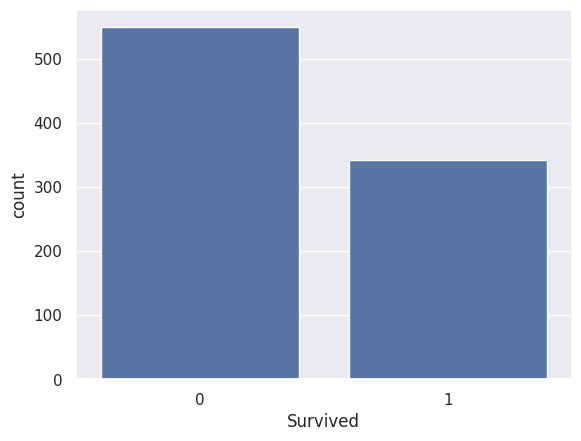

In [8]:
# @title How many survived?

# sns is the module called as seaborn
# A `countplot` looks at the column values and calculates how many times does a
# specific value show up
sns.countplot(x="Survived", data=df)

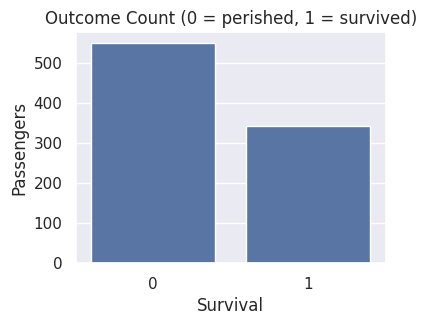

In [9]:
# @title How many survived? - Slightly prettier

# plt is matplotlib

# figure() lets us set the size of the plot
plt.figure(figsize=(4, 3))

# Same plot as before
sns.countplot(x="Survived", data=df)

# Give the plot a title
plt.title("Outcome Count (0 = perished, 1 = survived)")

# Give the X and Y Axes labels
plt.xlabel("Survival")
plt.ylabel("Passengers")

# Show it with the above tweaks applied
plt.show()

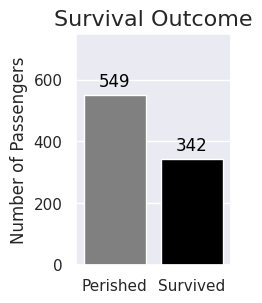

In [10]:
# @title How many survived? - Even Prettier

# Tweaks:
#  Smaller size
#  Nicer colors for the bars, one per bar
#  Show counts on top of the bars
#  Change font sizes and various texts
plt.figure(figsize=(2, 3))

ax = sns.countplot(x="Survived", hue='Survived', data=df,
                   palette=["grey", "black"], legend=False)

plt.title("Survival Outcome", fontsize=16)
plt.xlabel("", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():0.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks([0, 1], ['Perished', 'Survived'])
plt.ylim(0, df['Survived'].value_counts().max() + 200)

plt.show()

## The importance of visualization

<Axes: xlabel='Age', ylabel='Count'>

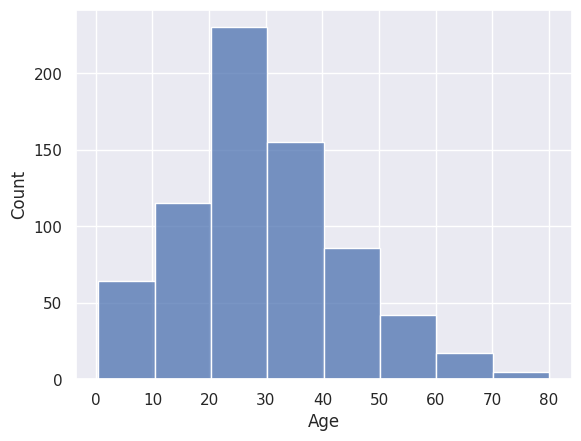

In [11]:
# @title Histogram of the Age column

# A histogram is similar to countplot, but instead of individual values,
# data is put into ranges of values (bins/buckets) and the counts for the bins
# are shown

sns.histplot(x="Age", data=df, bins=8)

<Axes: xlabel='Age', ylabel='Count'>

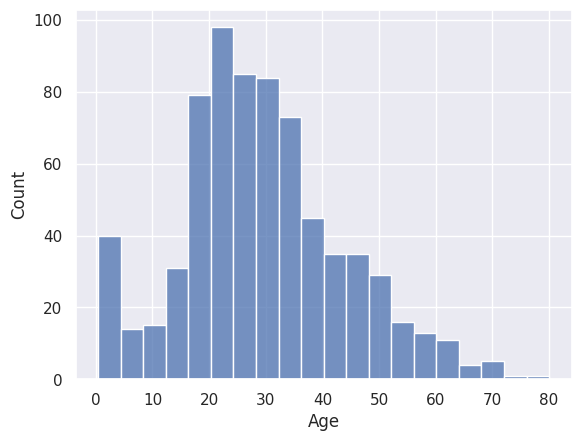

In [12]:
# @title Histogram of Age with 20 bins
sns.histplot(x="Age", data=df, bins=20)

<Axes: xlabel='Age', ylabel='Count'>

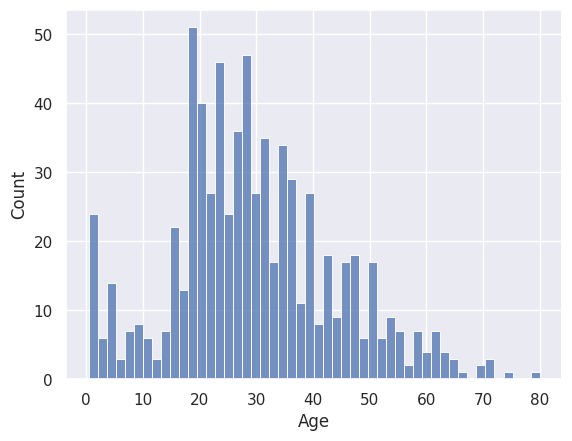

In [13]:
# @title Histogram of Age with 50 bins
sns.histplot(x="Age", data=df, bins=50)

# Visualization is an art

This section is meant for student drive exploration.

<Axes: xlabel='Age', ylabel='Fare'>

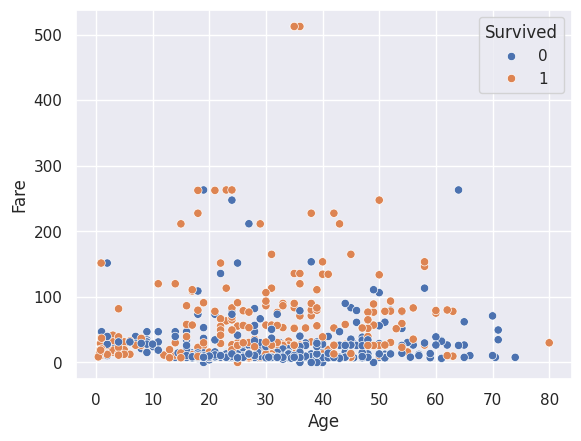

In [14]:
# @title Scatterplot to see how age and fare are related by coloring based on survival

sns.scatterplot(x='Age', y='Fare', data=df, hue='Survived')

<Axes: xlabel='Age', ylabel='Sex'>

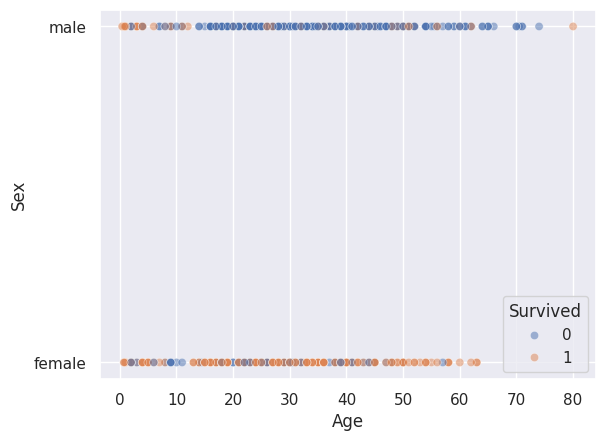

In [15]:
# @title Scatterplot to see how age and sex are related

sns.scatterplot(x='Age', y='Sex', data=df, hue='Survived', alpha=0.5)

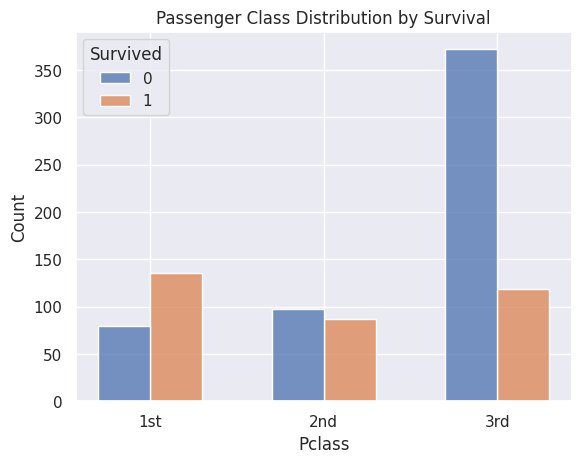

In [16]:
# @title Histogram of Passenger Class counts by Survival
import warnings
warnings.filterwarnings("ignore", message="When grouping with a length-1 list-like")

# discrete=True tells the plot that the data is not continuous
# shrink reduces the size between bars
sns.histplot(x='Pclass', data=df, hue='Survived', multiple="dodge",
             discrete=True, shrink=0.6)
plt.title('Passenger Class Distribution by Survival')
# Label the X-axis values as 1=1st, 2=2nd, 3=3rd
plt.xticks([1, 2, 3], ['1st', '2nd', '3rd'])
plt.show()

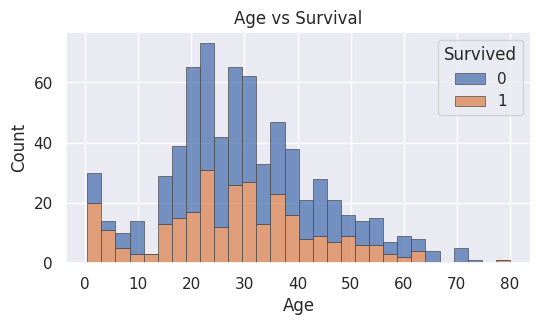

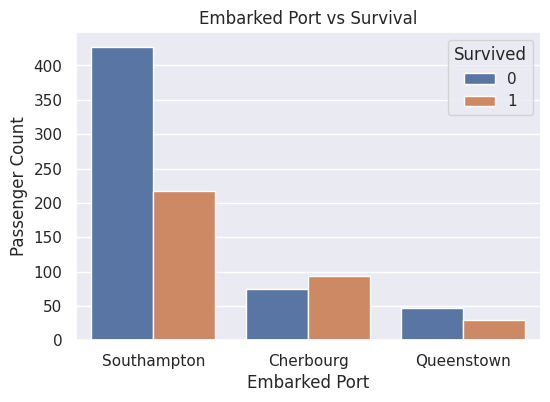

In [17]:
# @title Bunch of plots

# Age stacked
plt.figure(figsize=(6,3))
sns.histplot(df, x="Age", hue="Survived",
             multiple="stack", bins=30,
             edgecolor=".3", linewidth=.5)
plt.title("Age vs Survival"); plt.xlabel("Age"); plt.ylabel("Count")
plt.show()

# Embarked Port vs Survival
plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Embarked Port vs Survival')
plt.xlabel('Embarked Port')
plt.ylabel('Passenger Count')
plt.xticks(['S', 'C', 'Q'],
           ['Southampton', 'Cherbourg', 'Queenstown'])
plt.show()

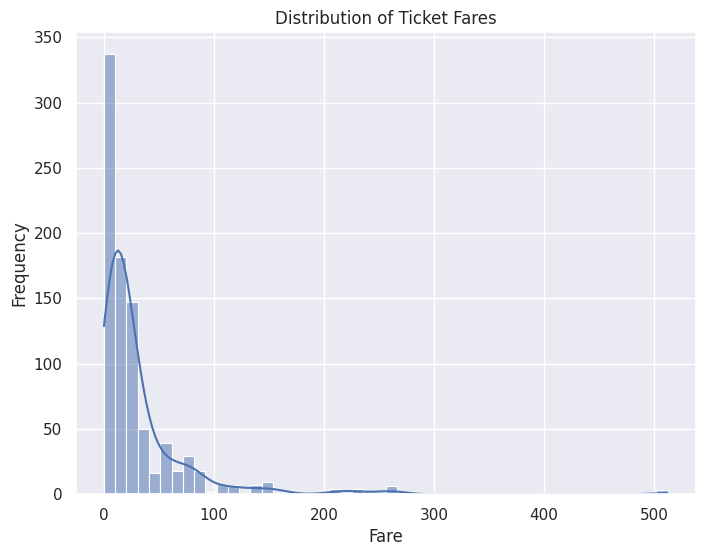

In [18]:
# @title Even more plots

plt.figure(figsize=(8, 6))
sns.histplot(df['Fare'], bins=50, kde=True)
plt.title('Distribution of Ticket Fares')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Data Cleaning

The dataset is not "clean". There are missing or invalid values in multiple columns. We will do a dive into the data and figure out how to clean it up without changing the nature of the data itself

In [19]:
# @title Passengers lacking age info

print("*** Missing Age Mask : Start ***")
# Generate a mask for rows based on recorded age.
# A mask has the same number of rows as the original data.
# It acts like a filter where:
#   A False means age is not missing, i.e., has a recorded age.
#   A True means age is missing.
rows_missing_age_mask = df["Age"].isna()
print(rows_missing_age_mask)

print("*** Missing Age Mask : End  ***\n\n")

rows_missing_age = df[rows_missing_age_mask]
# Or more succinctly
rows_missing_age = df[df["Age"].isna()]
print(f"{len(rows_missing_age)} passengers have no recorded age.")

*** Missing Age Mask : Start ***
0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool
*** Missing Age Mask : End  ***


177 passengers have no recorded age.


In [20]:
# @title What about missing or invalid (NA) values for the entire dataset

na_filtered = df.isna()
na_count = na_filtered.sum()
na_pct   = (na_filtered.mean()*100).round(1)

pd.DataFrame({"NA count": na_count, "NA %": na_pct})

,NA count,NA %
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,177,19.9
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


## Data Cleaning Strategies

We will use the following strategies to "impute" NA values:

*   **Age**: Replace missing values with the median()
  * Why median? Why not mean or mode?
*   **Cabin**: Dropped.
  * Cabin contains cabin numbers and 77% of them are missing. There is no reasonable way to fill them in, so we will drop the column itself.
*   **Ticket, Name**: Dropped.
  * Ticket and Name columns are all unique numbers and names. Neither of those have much value when it comes to doing anything interesting with the data, so we drop them as well.
*   **Sex**: Replace male with 0 and female with 1.
  * Some forms of data processing works best when working with numbers. Replacing the strings with numbers does not bias the data.
*   **Embarked**: Drop the rows which do not have this data
  * There are only 2 rows with NA Embarked column, so it is safe to drop them. This does introduce a bias in the data, but we will live with it.


In [21]:
# @title Create a copy of the original data and clean the copy

cleaned_df = df.copy()

age_median = cleaned_df["Age"].median()
cleaned_df.fillna({"Age": age_median}, inplace=True)

# Drop Cabin because lots of missing data and no real way of filling it in
# Drop Ticket and Name columns because they have hundreds of unique values
cleaned_df.drop(columns=["Cabin", "Ticket", "Name"], inplace=True)

# Convert sex from male/female to 0/1
cleaned_df["Sex"] = cleaned_df["Sex"].map({"male": 0, "female": 1})

# Drop the rows with missing Embarked.
cleaned_df.dropna(subset=["Embarked"], inplace=True)

print(cleaned_df.isna().sum().sum(), "missing cells left.")
display(cleaned_df.head())

0 missing cells left.


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


# Predictions

Now that we have a cleaned dataset, let's do something interesting with it. Given any passenger's details (without the Survived column):


* Can we predict if that passenger survived?
* How accurate can we get?

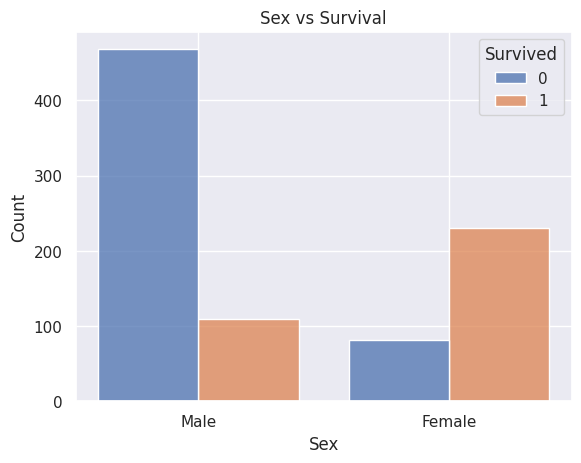

In [22]:
# @title Sex column seemed to have a lot of value when it comes to prediction

sns.histplot(x="Sex", hue="Survived", data=cleaned_df, multiple="dodge",
             discrete=True, shrink=0.8)
plt.xticks([0, 1], ['Male', 'Female'])
plt.title('Sex vs Survival')
plt.show()

In [23]:
# @title Prediction using Sex column

def will_passenger_survive_based_on_sex(passenger):
  """ Return True if the passenger is female, otherwise False."""
  return passenger["Sex"] == 1

def test_prediction(df, prediction_fn):
  predictions = df.apply(prediction_fn, axis=1)
  accuracy = (predictions == df["Survived"]).mean()
  print(f"Accuracy for {prediction_fn.__name__}: {accuracy*100:.2f}%")
  return accuracy*100

accuracy_sex = test_prediction(cleaned_df, will_passenger_survive_based_on_sex)

Accuracy for will_passenger_survive_based_on_sex: 78.63%


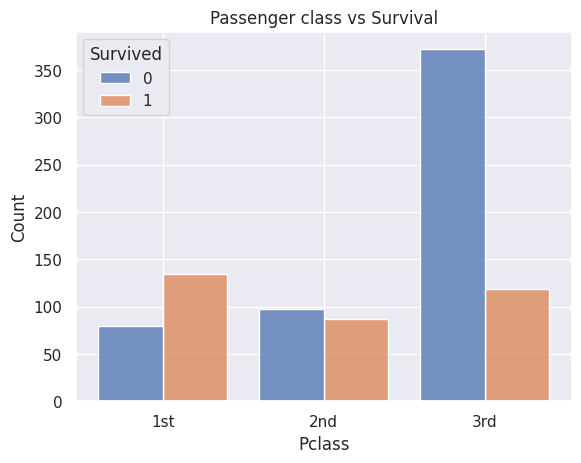

Accuracy for will_passenger_survice_based_on_sex_pclass: 75.03%
Change in accuracy: -3.60%


In [24]:
# @title Can we do better with two columns?

sns.histplot(x="Pclass", hue="Survived", data=cleaned_df, multiple="dodge",
             discrete=True, shrink=0.8)
plt.xticks([1, 2, 3], ['1st', '2nd', '3rd'])
plt.title('Passenger class vs Survival')
plt.show()

def will_passenger_survice_based_on_sex_pclass(passenger):
  """
  Return True if the passenger is female or 1st class passenger, otherwise
  False.
  """
  return (passenger["Sex"] == 1) or (passenger["Pclass"] == 1)


accuracy_sex_pclass = test_prediction(cleaned_df, will_passenger_survice_based_on_sex_pclass)
print(f"Change in accuracy: {(accuracy_sex_pclass-accuracy_sex):.2f}%")

# Lab Exercise:
Start with `cleaned_df` and do the following:

* **Make `countplot`** s for the following columns. With the plots write down one or two lines about what you notice about the plots:
  * SibSp vs Survived
  * Embarked vs Survived
  * Fare vs Survived
  * Use a new cell for these
* **Write a prediction function** using any of the columns. You do not have to make it better, but you can always try
  * Use a new cell for this. Call the function `my_predictor`.
  * You can check the change in accuracy using the following code:
  ```python
  my_accuracy = test_prediction(cleaned_df, my_predictor)
  print(f"Change in accuracy: {(my_accuracy-accuracy_sex):.2f}%")
  ```

In [25]:
cleaned_df=df.copy()


<Axes: xlabel='SibSp', ylabel='count'>

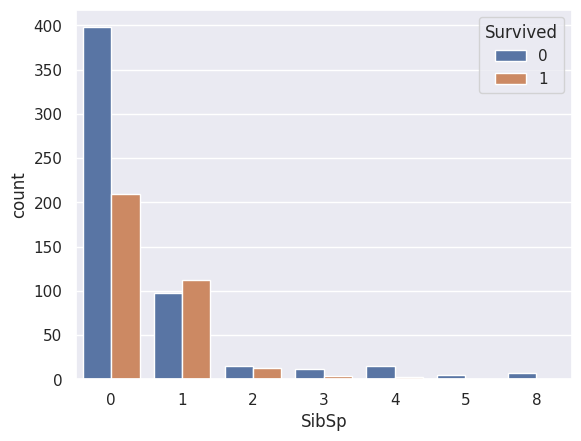

In [26]:
#SibSp vs Survived
sns.countplot(x="SibSp", hue="Survived", data=cleaned_df)


* I notice that the SibSp had the highest count for 0 & 1 and leveled off after that. Another big point is the gap between survived and not survived for SibSp.

<Axes: xlabel='Embarked', ylabel='count'>

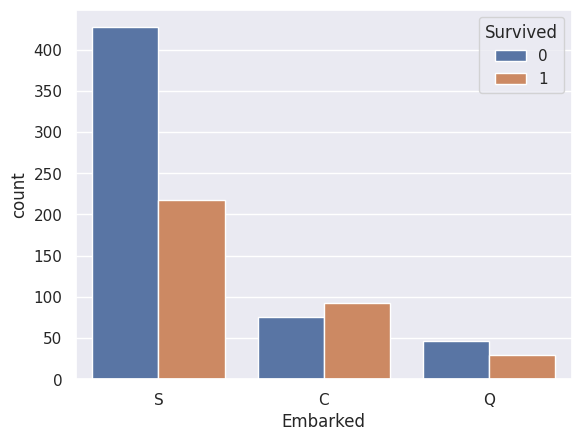

In [27]:
#Embarked vs Survived
sns.countplot(x="Embarked", hue="Survived", data=cleaned_df)

* I noticed that the embarked data was divided into s, c, and q and had a similar trend to SibSp as it got lower from left to right.

<Axes: xlabel='Fare', ylabel='count'>

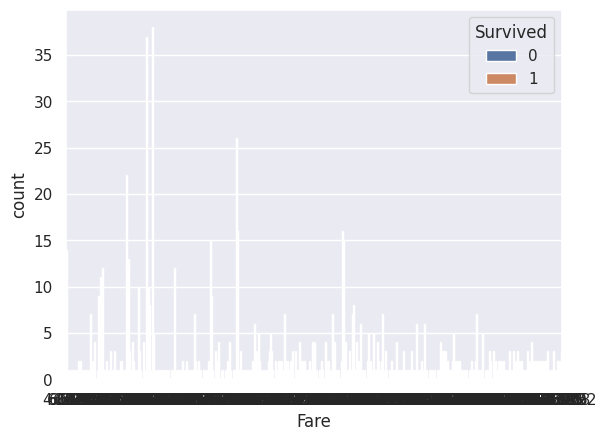

In [28]:
#Fare vs Survived
sns.countplot(x="Fare", hue="Survived", data=cleaned_df)


* Something I noticed was how busy the data was for amount of fare, the numbers all bunched up creating a messy graph being hard to decipher much. One thing to notice though is the large data set in terms of count in the first-ish part.

In [29]:
def my_predictor(passenger):
  """
  A simple prediction function based on the number of siblings/spouses.
  Predicts survival if the passenger has 1 or fewer siblings/spouses.
  """
  return passenger["SibSp"] <= 1

my_accuracy = test_prediction(cleaned_df, my_predictor)
print(f"Change in accuracy: {(my_accuracy-accuracy_sex):.2f}%")


Accuracy for my_predictor: 42.20%
Change in accuracy: -36.43%
